In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [6]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

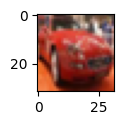

In [7]:
plot_sample(5)

In [8]:
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

In [9]:
classes[0]

'airplane'

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
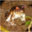

In [10]:
X_train[0]

In [11]:
X_train_scaled = X_train / 255

In [12]:
X_test_scaled = X_test/255

In [13]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [14]:
y_train_categorical = keras.utils.to_categorical(
        y_train,num_classes = 10, dtype = 'float32'
)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [15]:
y_test_categorical = keras.utils.to_categorical(
        y_test,num_classes = 10, dtype = 'float32'
)
y_test_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000,activation = "relu"),
    keras.layers.Dense(1000,activation = "relu"),
    keras.layers.Dense(10,activation = "sigmoid")

])

model.compile(
    optimizer = "SGD",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

model.fit(X_train_scaled,y_train_categorical, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8182 - accuracy: 0.3504
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6242 - accuracy: 0.4258
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5437 - accuracy: 0.4526
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4845 - accuracy: 0.4776
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4345 - accuracy: 0.4947
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3887 - accuracy: 0.5114
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3514 - accuracy: 0.5241
Epoch 8/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3198 - accuracy: 0.5373
Epoch 9/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2830 - accuracy: 0.5491
Epoch 10/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.253

It took only 7 minutes with T4 GPU

In [19]:
classes[np.argmax(model.predict(X_test_scaled)[1])]

313/313 [==============================] - 1s 2ms/step


'ship'

In [20]:
classes[y_test[1][0]]

'ship'

In [21]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 2s 4ms/step - loss: 1.6744 - accuracy: 0.5387


[1.674416422843933, 0.5386999845504761]

In [24]:
def get_model():
  model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000,activation = "relu"),
    keras.layers.Dense(1000,activation = "relu"),
    keras.layers.Dense(10,activation = "sigmoid")

  ])

  model.compile(
      optimizer = "SGD",
      loss = "categorical_crossentropy",
      metrics = ["accuracy"]
  )
  return model

In [25]:
%%timeit -n1 -r1
with tf.device("/GPU:0"):
  cpu_model = get_model()
  cpu_model.fit(X_train_scaled,y_train_categorical, epochs = 1)

1563/1563 [==============================] - 8s 5ms/step - loss: 1.8117 - accuracy: 0.3543
10.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [26]:
%%timeit -n1 -r1
with tf.device("/CPU:0"):
  cpu_model = get_model()
  cpu_model.fit(X_train_scaled,y_train_categorical, epochs = 1)

1563/1563 [==============================] - 130s 83ms/step - loss: 1.8131 - accuracy: 0.3549
2min 11s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
